In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import kagglehub
from sklearn.preprocessing import MinMaxScaler

In [2]:
import kagglehub

path = kagglehub.dataset_download("behrad3d/nasa-cmaps")

print("Path to dataset files:", path)
! mv {path} ./data

100%|██████████| 12.3M/12.3M [00:04<00:00, 2.82MB/s]

Extracting files...


Path to dataset files: /home/dora/.cache/kagglehub/datasets/behrad3d/nasa-cmaps/versions/1


In [3]:
df = pd.read_csv('./data/CMaps/train_FD001.txt', delim_whitespace=True, header=None)

/tmp/ipykernel_13473/2412183946.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('./data/CMaps/train_FD001.txt', delim_whitespace=True, header=None)


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
df.shape

(20631, 26)

In [6]:
columns = ['engine_id', 'cycle', 'setting_1', 'setting_2', 'setting_3'] + [f'sensor_{i}' for i in range(1, 22)]
df.columns = columns
df.head()

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
print(f"Number of unique engines: {df['engine_id'].nunique()}")

Number of unique engines: 100


In [8]:
# 1)	unit number
# 2)	time, in cycles
# 3)	operational setting 1
# 4)	operational setting 2
# 5)	operational setting 3
# 6)	sensor measurement  1
# 7)	sensor measurement  2
# ...
# 26)	sensor measurement  22

In [9]:
df.isnull().sum()

engine_id    0
cycle        0
setting_1    0
setting_2    0
setting_3    0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
dtype: int64

In [10]:
scaler = MinMaxScaler()
df[df.columns[2:]] = scaler.fit_transform(df[df.columns[2:]])

# Statistic Study

In [11]:
df.describe()

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.0,...,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,0.499490,0.501959,0.0,0.0,0.443052,0.424746,0.450435,0.0,...,0.580697,0.317871,0.226095,0.451118,0.0,0.434221,0.0,0.0,0.524241,0.546127
std,29.227633,68.880990,0.125708,0.244218,0.0,0.0,0.150618,0.133664,0.151935,0.0,...,0.157261,0.105763,0.098442,0.144306,0.0,0.129064,0.0,0.0,0.140114,0.149476
min,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,26.000000,52.000000,0.413793,0.333333,0.0,0.0,0.335843,0.331807,0.339467,0.0,...,0.484009,0.235294,0.171870,0.346287,0.0,0.333333,0.0,0.0,0.434109,0.452361
50%,52.000000,104.000000,0.500000,0.500000,0.0,0.0,0.430723,0.415522,0.435348,0.0,...,0.594883,0.308824,0.209516,0.438630,0.0,0.416667,0.0,0.0,0.534884,0.557443
75%,77.000000,156.000000,0.586207,0.750000,0.0,0.0,0.539157,0.508829,0.545324,0.0,...,0.695096,0.382353,0.249613,0.541362,0.0,0.500000,0.0,0.0,0.627907,0.652582
max,100.000000,362.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000


In [12]:
df.dtypes

engine_id      int64
cycle          int64
setting_1    float64
setting_2    float64
setting_3    float64
sensor_1     float64
sensor_2     float64
sensor_3     float64
sensor_4     float64
sensor_5     float64
sensor_6     float64
sensor_7     float64
sensor_8     float64
sensor_9     float64
sensor_10    float64
sensor_11    float64
sensor_12    float64
sensor_13    float64
sensor_14    float64
sensor_15    float64
sensor_16    float64
sensor_17    float64
sensor_18    float64
sensor_19    float64
sensor_20    float64
sensor_21    float64
dtype: object

In [13]:
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f}Mb")

Memory: 4.09Mb


Engine lifespans - Mean: 206.3, Std: 46.3
Min lifespan: 128, Max lifespan: 362


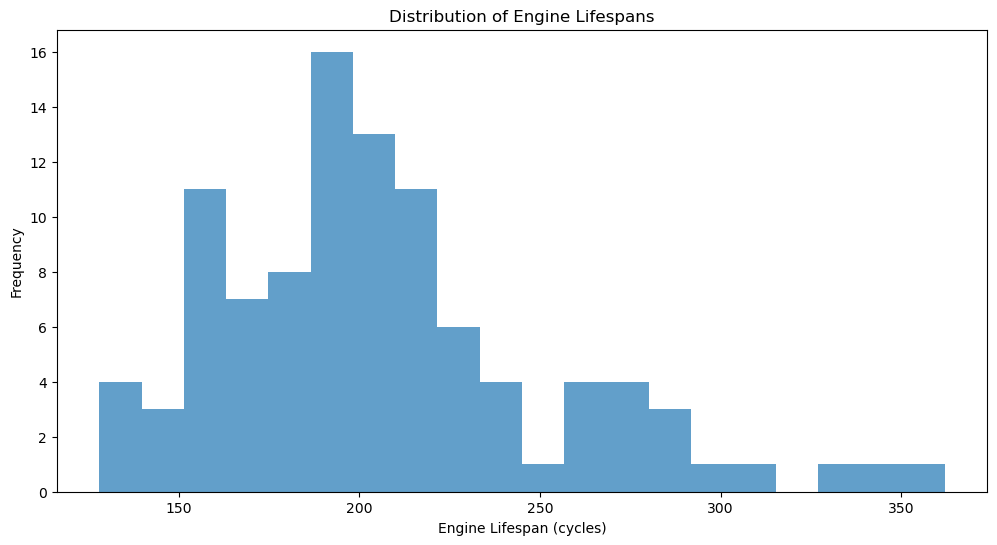

In [14]:
engine_cycles = df.groupby('engine_id')['cycle'].max()
print(f"Engine lifespans - Mean: {engine_cycles.mean():.1f}, Std: {engine_cycles.std():.1f}")
print(f"Min lifespan: {engine_cycles.min()}, Max lifespan: {engine_cycles.max()}")

plt.figure(figsize=(12, 6))
plt.hist(engine_cycles, bins=20, alpha=0.7)
plt.xlabel('Engine Lifespan (cycles)')
plt.ylabel('Frequency')
plt.title('Distribution of Engine Lifespans')
plt.show()

Constant sensors: ['sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']


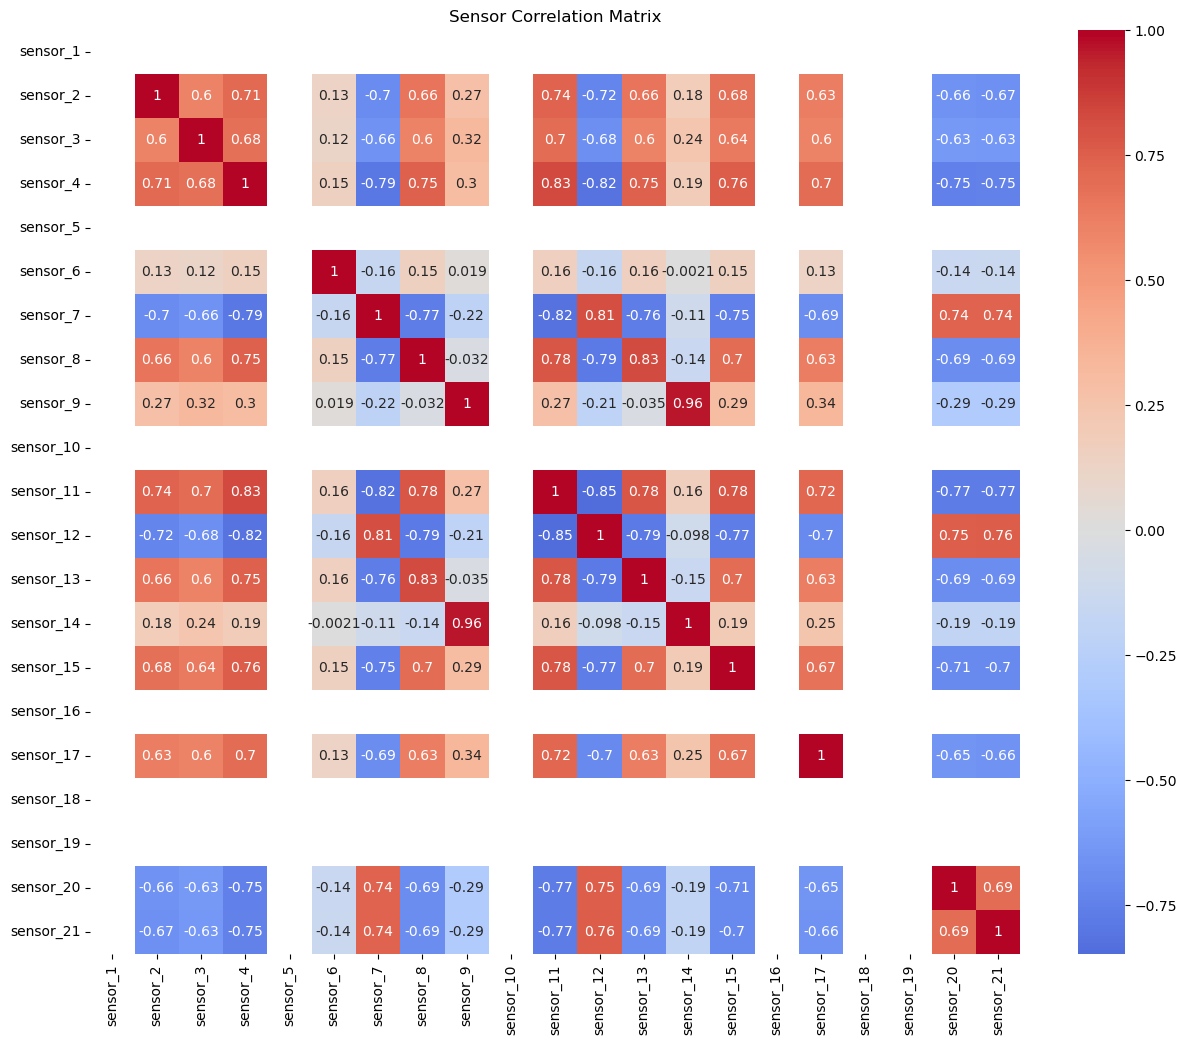

In [15]:

sensor_cols = [col for col in df.columns if 'sensor' in col]
sensor_stats = df[sensor_cols].describe()

constant_sensors = []
for col in sensor_cols:
	if df[col].nunique() == 1:
		constant_sensors.append(col)
print(f"Constant sensors: {constant_sensors}")

plt.figure(figsize=(15, 12))
correlation_matrix = df[sensor_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Sensor Correlation Matrix')
plt.show()

In [16]:
def plot_sensor_trends(sample_engines, sensor_cols):
	fig, axes = plt.subplots(2, 3, figsize=(18, 10))
	axes = axes.flatten()
	for i, sensor in enumerate(sensor_cols):
		for engine in sample_engines:
			engine_data = df[df['engine_id'] == engine]
			axes[i].plot(engine_data['cycle'], engine_data[sensor], alpha=0.7, label=f'Engine {engine}')
		axes[i].set_title(f'{sensor} Over Time')
		axes[i].set_xlabel('Cycle')
		axes[i].set_ylabel('Sensor Value')
		if i == 0:
			axes[i].legend()
	plt.tight_layout()
	plt.suptitle(f'Sensor Trends for Engines {sample_engines}', y=1.02)
	plt.show()

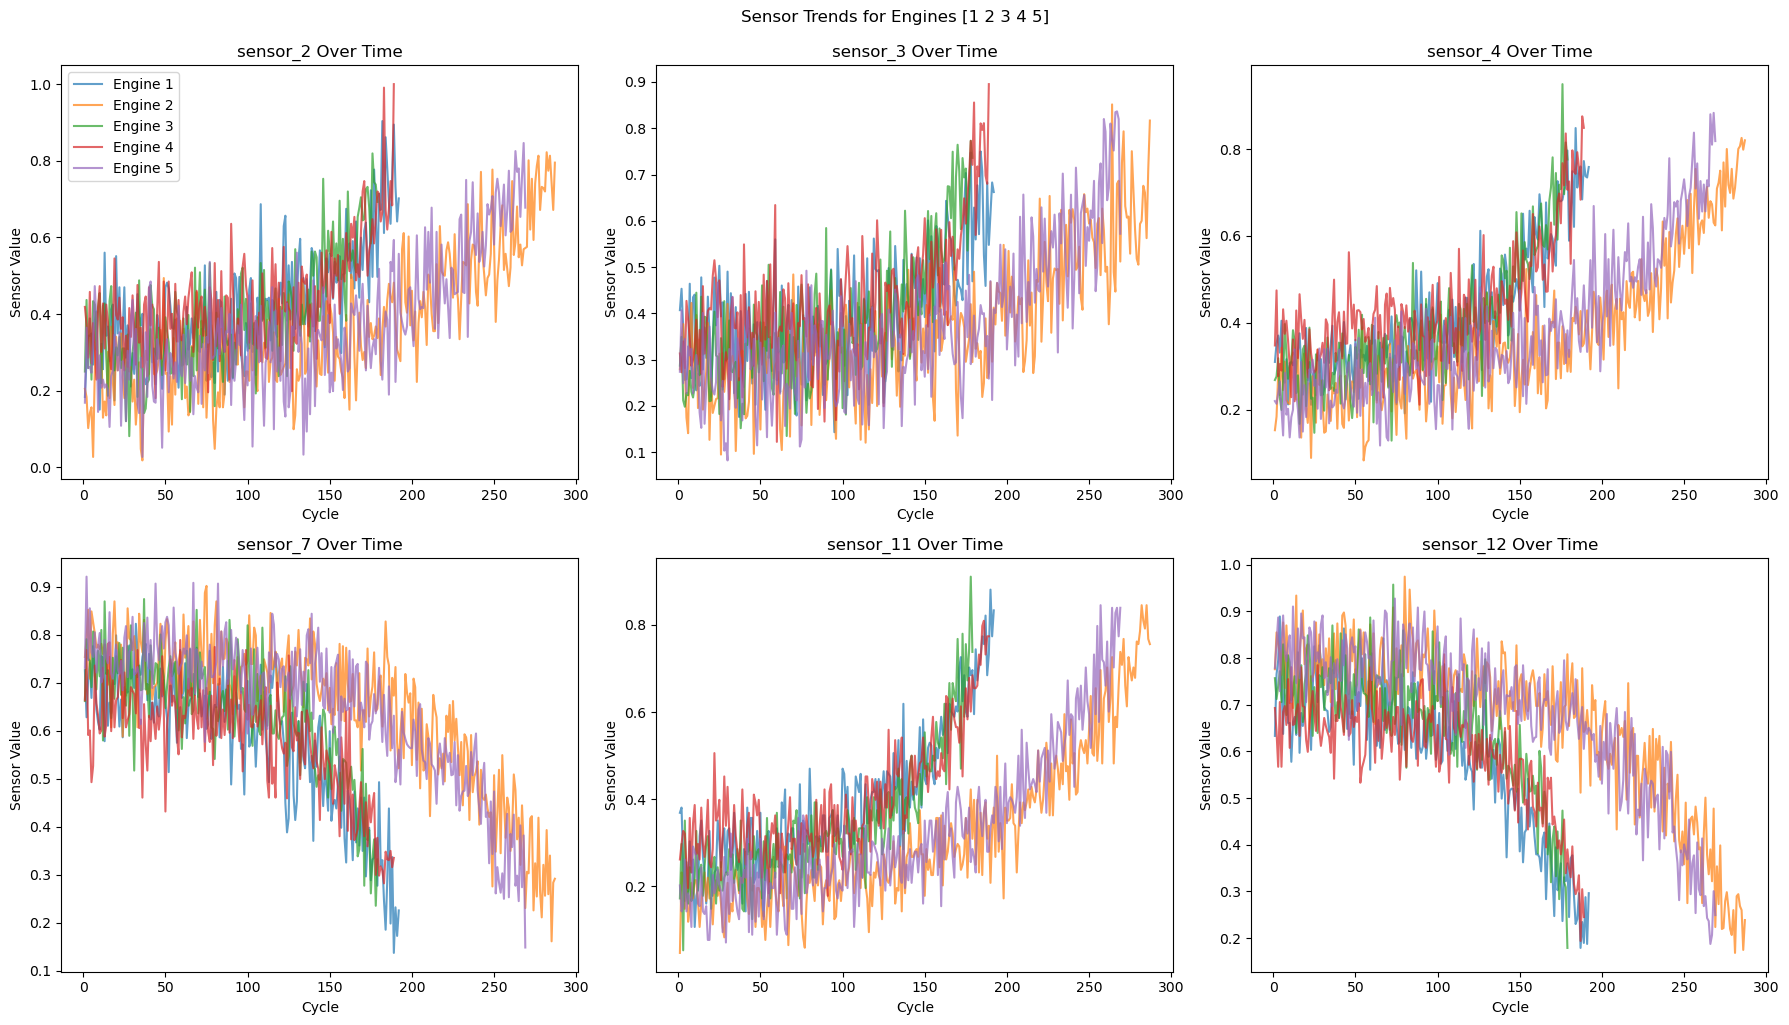

In [17]:

sample_engines = df['engine_id'].unique()[:5]  # only take first 5 eng here 

sensor_cols = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_11', 'sensor_12']
plot_sensor_trends(sample_engines, sensor_cols)
# for i, sensor in enumerate(['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_11', 'sensor_12']):
#     for engine in sample_engines:
#         engine_data = df[df['engine_id'] == engine]
#         axes[i].plot(engine_data['cycle'], engine_data[sensor], alpha=0.7, label=f'Engine {engine}')
#     axes[i].set_title(f'{sensor} Over Time')
#     axes[i].set_xlabel('Cycle')
#     axes[i].set_ylabel('Sensor Value')
#     if i == 0:
#         axes[i].legend()

# plt.tight_layout()
# plt.show()

In [18]:

def calculate_degradation_slope(group):
    slopes = {}
    for sensor in sensor_cols:
        if group[sensor].var() > 0: 
            x = group['cycle'].values
            y = group[sensor].values
            slope = np.polyfit(x, y, 1)[0]
            slopes[f'{sensor}_slope'] = slope
    return pd.Series(slopes)

degradation_slopes = df.groupby('engine_id').apply(calculate_degradation_slope)
print("Sensors with highest degradation variance:")
print(degradation_slopes.std().sort_values(ascending=False).head(10))


Sensors with highest degradation variance:
sensor_12_slope    0.000587
sensor_11_slope    0.000538
sensor_7_slope     0.000491
sensor_4_slope     0.000457
sensor_2_slope     0.000428
sensor_3_slope     0.000329
dtype: float64


/tmp/ipykernel_13473/2000234344.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  degradation_slopes = df.groupby('engine_id').apply(calculate_degradation_slope)


In [19]:
setting_cols = ['setting_1', 'setting_2', 'setting_3']
print("Operational Settings Statistics:")
print(df[setting_cols].describe())

for setting in setting_cols:
    setting_changes = df.groupby('engine_id')[setting].nunique()
    print(f"{setting} - Engines with changing settings: {(setting_changes > 1).sum()}")

Operational Settings Statistics:
          setting_1     setting_2  setting_3
count  20631.000000  20631.000000    20631.0
mean       0.499490      0.501959        0.0
std        0.125708      0.244218        0.0
min        0.000000      0.000000        0.0
25%        0.413793      0.333333        0.0
50%        0.500000      0.500000        0.0
75%        0.586207      0.750000        0.0
max        1.000000      1.000000        0.0
setting_1 - Engines with changing settings: 100
setting_2 - Engines with changing settings: 100
setting_3 - Engines with changing settings: 0


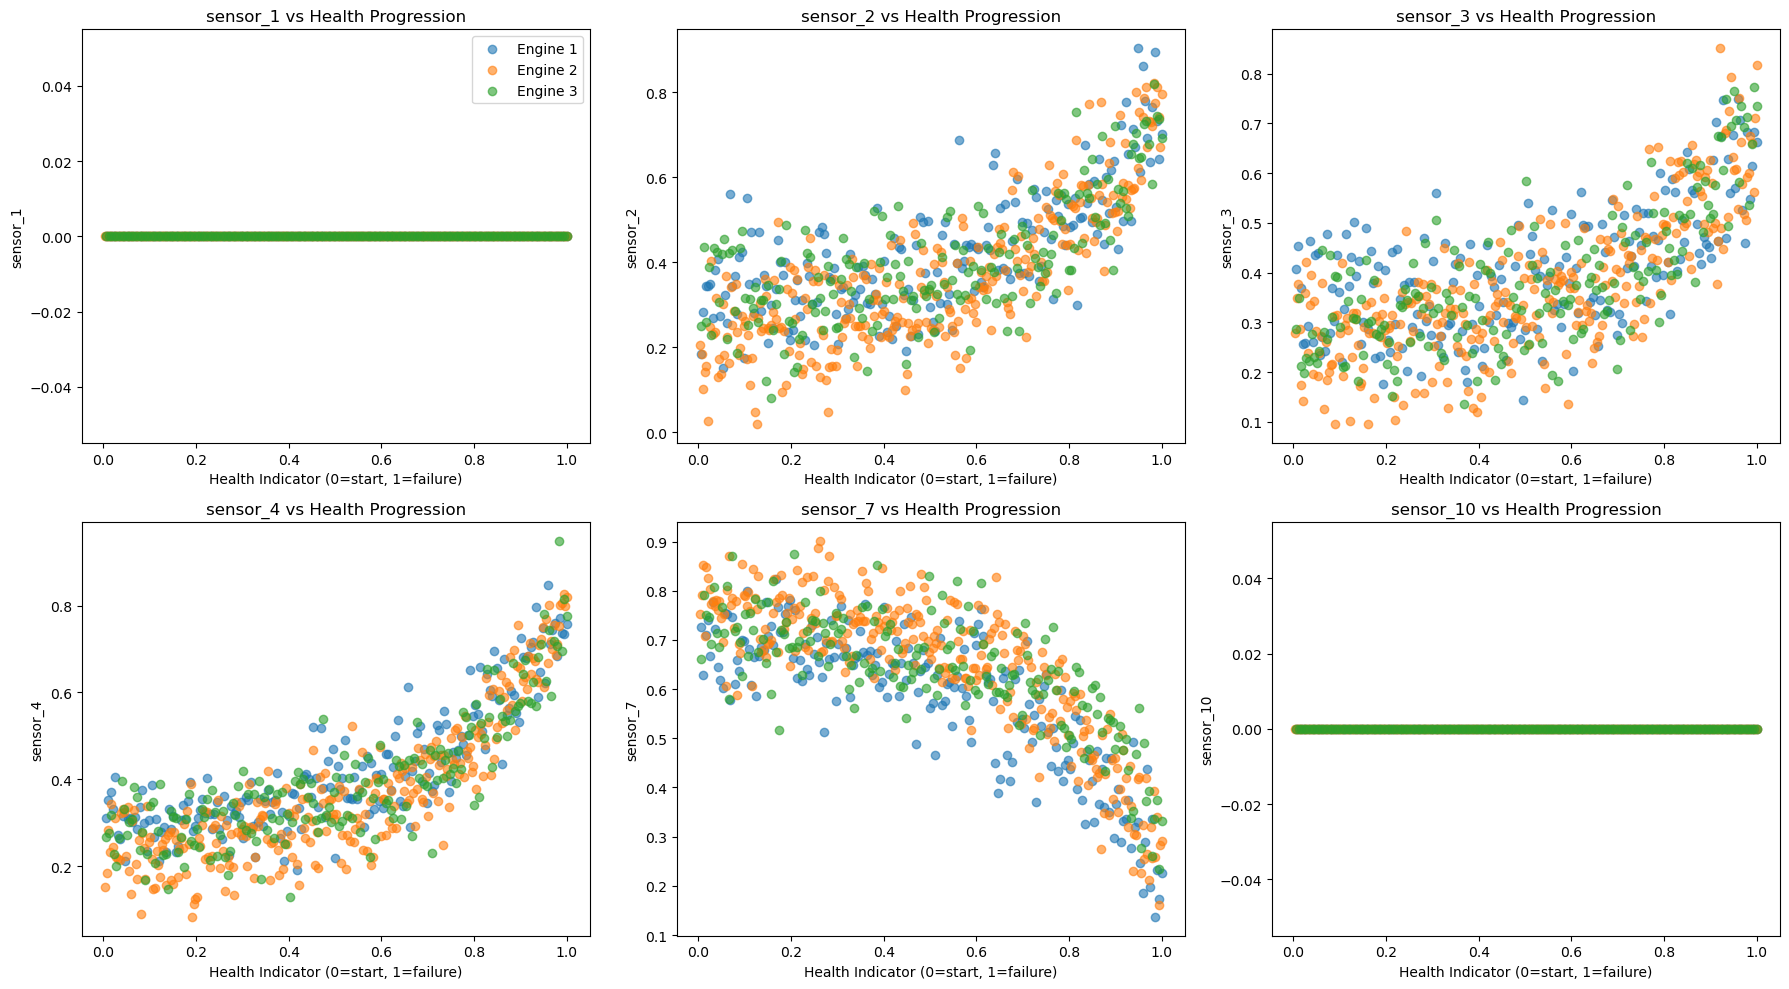

In [20]:

df['health_indicator'] = df.groupby('engine_id')['cycle'].transform(lambda x: x / x.max())

# Plot health indicator vs key sensors
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
key_sensors = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_10']

for i, sensor in enumerate(key_sensors):
    ax = axes[i//3, i%3]
    sample_data = df[df['engine_id'].isin(sample_engines[:3])]
    for engine in sample_engines[:3]:
        engine_data = sample_data[sample_data['engine_id'] == engine]
        ax.scatter(engine_data['health_indicator'], engine_data[sensor], 
                  alpha=0.6, label=f'Engine {engine}')
    ax.set_xlabel('Health Indicator (0=start, 1=failure)')
    ax.set_ylabel(f'{sensor}')
    ax.set_title(f'{sensor} vs Health Progression')
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()

In [21]:
degradation_sensors = []
for sensor in sensor_cols:
    if df[sensor].var() > 0:  
        correlations = []
        for engine in df['engine_id'].unique():
            engine_data = df[df['engine_id'] == engine]
            if len(engine_data) > 5: 
                corr = engine_data['cycle'].corr(engine_data[sensor])
                if not np.isnan(corr):
                    correlations.append(abs(corr))
        
        if correlations and np.mean(correlations) > 0.3: 
            degradation_sensors.append(sensor)

print(f"Sensors showing degradation patterns: {degradation_sensors}")

Sensors showing degradation patterns: ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_11', 'sensor_12']


# ML

In [22]:
def add_rul(df):
    df['RUL'] = df.groupby('engine_id')['cycle'].transform(lambda x: x.max() - x)
    return df

df = add_rul(df)

In [23]:
df.head()

,engine_id,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,health_indicator,RUL
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,0.005208,191
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,0.010417,190
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,0.015625,189
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,0.020833,188
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,0.026042,187


In [24]:

window_size = 5
for sensor in degradation_sensors:
    df[f'{sensor}_rolling_mean'] = df.groupby('engine_id')[sensor].rolling(window_size).mean().values

for sensor in degradation_sensors:
    df[f'{sensor}_trend'] = df.groupby('engine_id')[sensor].diff()

In [25]:

test_df = pd.read_csv('./data/CMaps/test_FD001.txt', delim_whitespace=True, header=None)
test_rul = pd.read_csv('./data/CMaps/RUL_FD001.txt', header=None)

/tmp/ipykernel_13473/4227443511.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_df = pd.read_csv('./data/CMaps/test_FD001.txt', delim_whitespace=True, header=None)


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


features = degradation_sensors + ['cycle', 'setting_1', 'setting_2', 'setting_3']
X = df[features]
y = df['RUL']


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:

test_df.columns = columns


test_df[test_df.columns[2:]] = scaler.transform(test_df[test_df.columns[2:]])


test_rul.columns = ['RUL']

In [28]:
test_last_cycle = test_df.groupby('engine_id').last().reset_index()

X_test = test_last_cycle[features]
y_test = test_rul['RUL'].values

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")

RMSE: 28.46
MAE: 22.42
R²: 0.531


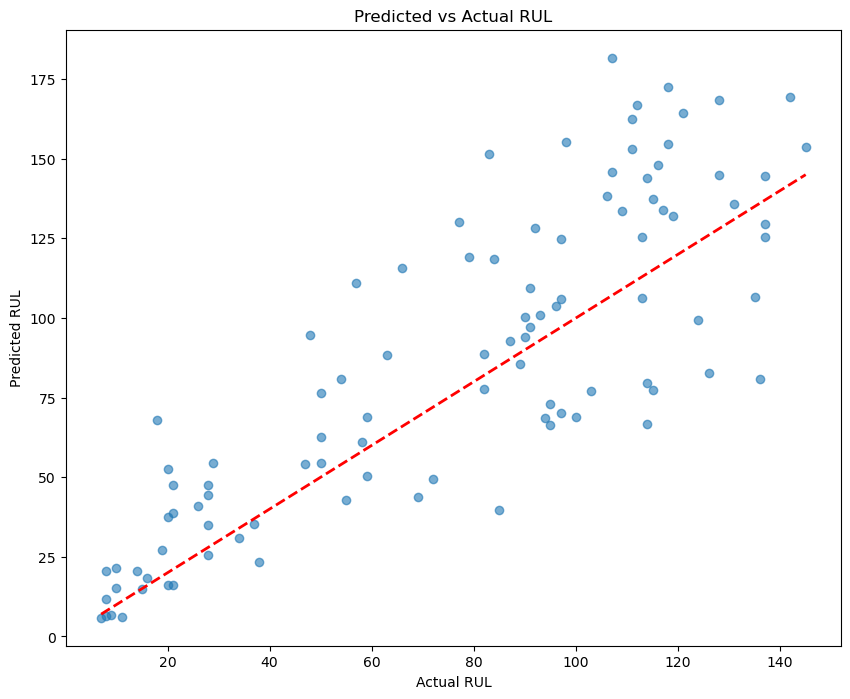

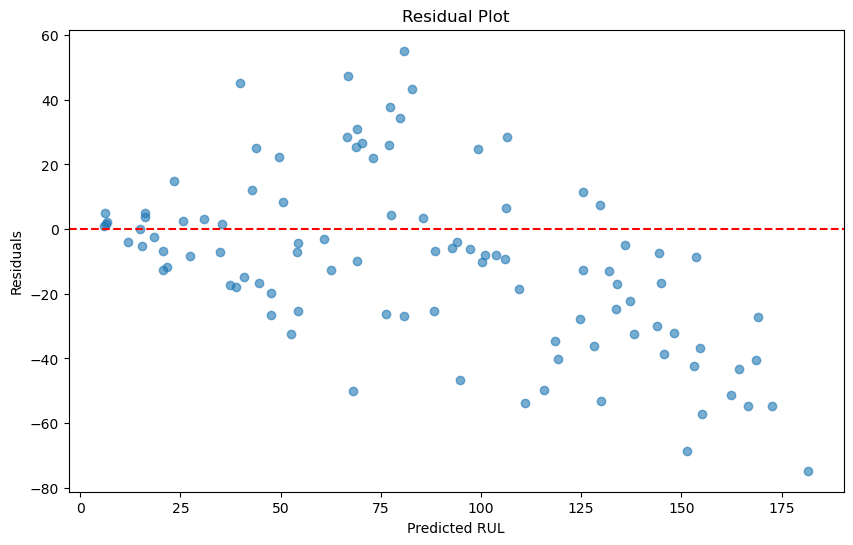

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Predicted vs Actual RUL')
plt.show()


plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted RUL')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

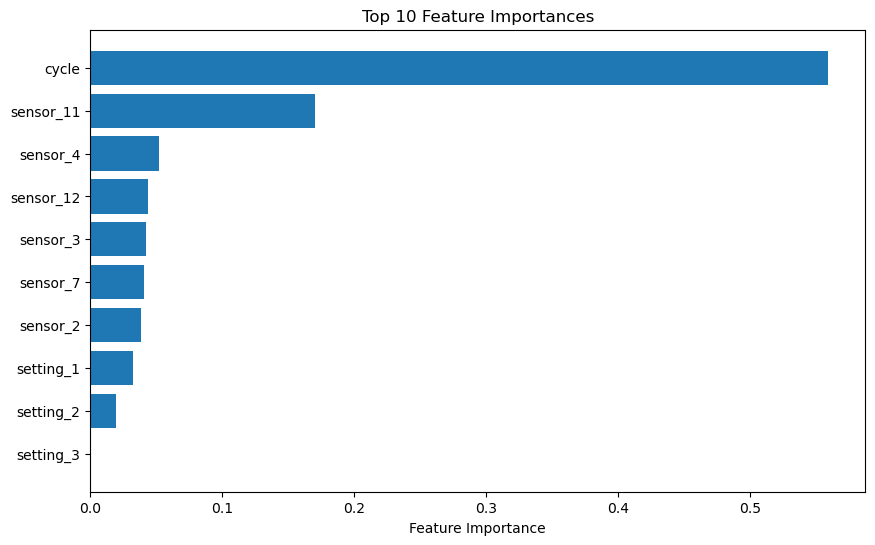

In [31]:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f"CV RMSE: {cv_rmse.mean():.2f} (+/- {cv_rmse.std() * 2:.2f})")

CV RMSE: 38.88 (+/- 17.87)


In [33]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f"CV RMSE: {cv_rmse.mean():.2f} (+/- {cv_rmse.std() * 2:.2f})")

CV RMSE: 38.88 (+/- 17.87)


In [34]:

baseline_pred = np.full(len(y_test), y.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))

print(f"Baseline RMSE: {baseline_rmse:.2f}")
print(f"Model RMSE: {rmse:.2f}")
print(f"Improvement: {((baseline_rmse - rmse) / baseline_rmse * 100):.1f}%")

Baseline RMSE: 52.62
Model RMSE: 28.46
Improvement: 45.9%


In [43]:
def predict_failure_time(model, engine_data, features, current_cycle=None):
    """
    Predict when an engine will fail based on current sensor readings
    
    Args:
        model: Trained ML model (your RandomForestRegressor)
        engine_data: Current sensor readings (pandas Series or DataFrame row)
        features: List of feature names used in training
        current_cycle: Current cycle number (if None, use from engine_data)
    
    Returns:
        dict: Contains predicted failure cycle, RUL, and confidence info
    """

    if current_cycle is None:
        current_cycle = engine_data['cycle']
    

    if isinstance(engine_data, pd.Series):
        current_features = engine_data[features].values.reshape(1, -1)
    else:
        current_features = engine_data[features].iloc[0].values.reshape(1, -1)
    
  
    predicted_rul = model.predict(current_features)[0]
    
  
    predicted_failure_cycle = current_cycle + predicted_rul
    

    tree_predictions = [tree.predict(current_features)[0] for tree in model.estimators_]
    prediction_std = np.std(tree_predictions)
    confidence = max(0, 1 - (prediction_std / np.mean(tree_predictions)))
    
    return {
        'engine_id': engine_data.get('engine_id', 'Unknown'),
        'current_cycle': current_cycle,
        'predicted_rul': predicted_rul,
        'predicted_failure_cycle': predicted_failure_cycle,
        'confidence': confidence,
        'prediction_std': prediction_std,
        'alert_level': 'HIGH' if predicted_rul <= 20 else 'MEDIUM' if predicted_rul <= 50 else 'LOW'
    }


test_engine_1 = test_df[test_df['engine_id'] == 1].iloc[-1]
result = predict_failure_time(model, test_engine_1, features)

print(f"Engine {result['engine_id']}:")
print(f"Current Cycle: {result['current_cycle']}")
print(f"Predicted RUL: {result['predicted_rul']:.1f} cycles")
print(f"Predicted Failure at Cycle: {result['predicted_failure_cycle']:.1f}")
print(f"Alert Level: {result['alert_level']}")
print(f"Confidence: {result['confidence']:.2f}")
features

Engine 1.0:
Current Cycle: 31.0
Predicted RUL: 166.8 cycles
Predicted Failure at Cycle: 197.8
Alert Level: LOW
Confidence: 0.73


/home/dora/miniconda3/envs/envNasa/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


['sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_7',
 'sensor_11',
 'sensor_12',
 'cycle',
 'setting_1',
 'setting_2',
 'setting_3']

In [37]:
import joblib

joblib.dump(model, 'rul_prediction_model.pk')

['rul_prediction_model.pk']

In [36]:

def monitor_all_engines(test_df, model, features):
    """Monitor all engines and return predictions"""
    predictions = []
    
    for engine_id in test_df['engine_id'].unique():
    
        latest_reading = test_df[test_df['engine_id'] == engine_id].iloc[-1]
        
        result = predict_failure_time(model, latest_reading, features)
        predictions.append(result)
    
    return pd.DataFrame(predictions).sort_values('predicted_rul')


engine_predictions = monitor_all_engines(test_df, model, features)
print("ENGINE FAILURE PREDICTIONS:")
engine_predictions




/home/dora/miniconda3/envs/envNasa/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/dora/miniconda3/envs/envNasa/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/dora/miniconda3/envs/envNasa/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/dora/miniconda3/envs/envNasa/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/dora/miniconda3/envs/envNasa/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X doe

ENGINE FAILURE PREDICTIONS:


/home/dora/miniconda3/envs/envNasa/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/dora/miniconda3/envs/envNasa/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/dora/miniconda3/envs/envNasa/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/dora/miniconda3/envs/envNasa/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,engine_id,current_cycle,predicted_rul,predicted_failure_cycle,confidence,prediction_std,alert_level
33,34.0,203.0,5.88,208.88,0.155366,4.966447,HIGH
34,35.0,198.0,6.08,204.08,0.142311,5.214748,HIGH
80,81.0,213.0,6.29,219.29,0.232164,4.829689,HIGH
81,82.0,162.0,6.75,168.75,0.274414,4.897704,HIGH
67,68.0,187.0,11.87,198.87,0.499511,5.940800,HIGH
...,...,...,...,...,...,...,...
0,1.0,31.0,166.76,197.76,0.731051,44.849999,LOW
64,65.0,71.0,168.59,239.59,0.760727,40.339087,LOW
38,39.0,37.0,169.25,206.25,0.749441,42.407163,LOW
84,85.0,34.0,172.58,206.58,0.746058,43.825376,LOW


agent dashboard ( laura ) LLM ( give to user only, summery and what he did)
abality to write and read in a directory a specific directory. 

custum output : 